In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
from mlflow.tracking.client import MlflowClient

In [7]:
mlflow.set_tracking_uri('file:///home/akira/akira/p-poteka-analysis/mlruns')

In [8]:
standard_eval_runs = MlflowClient().search_runs("8", filter_string="tags.mlflow.project.entryPoint = 'evaluate'")
print(f"standard evaluate runs count: {len(standard_eval_runs)}")

standard evaluate runs count: 14


In [9]:
from utils import get_results_dict, get_metrics_history_df
save_img_dir_path = "./grouped_chart/standard"

In [32]:
standard_results_dict = get_results_dict(standard_eval_runs)
save_img_dir_path = "./grouped_chart/standard"

In [18]:
param_names_list, seq_param_names_list = [], []
r2_scores_list, seq_r2_scores_list = [], []
for param_name, results_dict in standard_results_dict["r2_scores"].items():
    for key, val in results_dict.items():
        if "Sequential" in key:
            seq_param_names_list.append(param_name)
            seq_r2_scores_list.append(val)
        else:
            param_names_list.append(param_name)
            r2_scores_list.append(val)

df = pd.DataFrame({"input_parameters": param_names_list, "r2_score": r2_scores_list})
seq_df = pd.DataFrame({"input_parameters": seq_param_names_list, "r2_score": seq_r2_scores_list})
df.describe()

,r2_score
count,126.000000
mean,0.348421
std,0.139488
min,0.024000
25%,0.250000
50%,0.334000
75%,0.434500
max,0.650000


In [19]:
seq_df.describe()

,r2_score
count,126.000000
mean,0.937937
std,0.011115
min,0.905000
25%,0.931250
50%,0.940000
75%,0.945000
max,0.973000


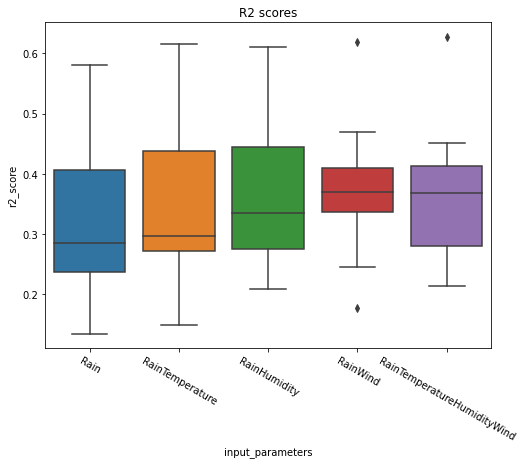

In [33]:
target_columns = ["Rain", "RainTemperature", "RainHumidity", "RainWind", "RainTemperatureHumidityWind"]
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df.loc[df["input_parameters"].isin(target_columns)], x="input_parameters", y="r2_score", order=target_columns)
ax.set_title("R2 scores")
plt.xticks(rotation=330)
fig.savefig(f"{save_img_dir_path}/r2scores.png")

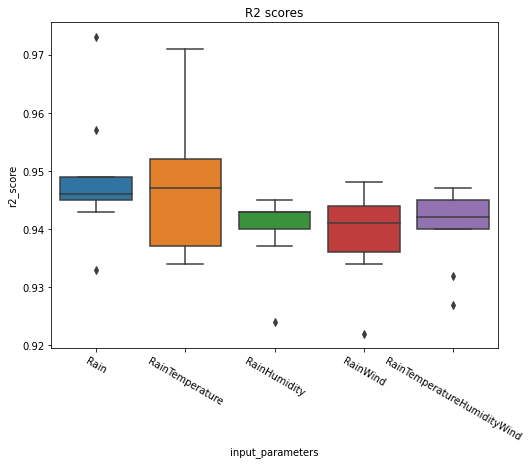

In [34]:
target_columns = ["Rain", "RainTemperature", "RainHumidity", "RainWind", "RainTemperatureHumidityWind"]
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=seq_df.loc[df["input_parameters"].isin(target_columns)], x="input_parameters", y="r2_score", order=target_columns)
ax.set_title("R2 scores")
plt.xticks(rotation=330)
fig.savefig(f"{save_img_dir_path}/seq_r2scores.png")